In [43]:

# There are a few very popular causation libraries in Python: Bnlearn, Pgmpy, DoWhy, and CausalImpact.
# let's explore the nuts and bolts of each one, in the cells shown below.


In [44]:

# Here are some key features and functionalities of bnlearn:

# Structure Learning:
#  bnlearn provides methods for learning the structure of Bayesian networks from data. This includes algorithms for 
# structure learning such as Hill-Climb Search and Tabu Search.

# Parameter Learning:
#  Once the structure of the Bayesian network is learned, bnlearn supports the estimation of parameters (conditional 
# probability distributions) based on the observed data.

# Inference:
#  The library allows for performing probabilistic inference on the learned Bayesian network. This involves predicting 
#  or querying the values of certain variables given evidence or observations.

# Visualization:
#  bnlearn includes tools for visualizing Bayesian network structures and probability distributions.

# Handling Missing Data:
#  The library provides mechanisms for handling missing data during the learning and inference processes.


In [45]:

# Installation
# pip install bnlearn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bnlearn as bn

# Import data set and drop continous and sensitive features
df = bn.import_example(data='census_income')
drop_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'race', 'sex']
df.drop(labels=drop_cols, axis=1, inplace=True)

print(df.head())


          workclass  education      marital-status         occupation  \
0         State-gov  Bachelors       Never-married       Adm-clerical   
1  Self-emp-not-inc  Bachelors  Married-civ-spouse    Exec-managerial   
2           Private    HS-grad            Divorced  Handlers-cleaners   
3           Private       11th  Married-civ-spouse  Handlers-cleaners   
4           Private  Bachelors  Married-civ-spouse     Prof-specialty   

    relationship native-country salary  
0  Not-in-family  United-States  <=50K  
1        Husband  United-States  <=50K  
2  Not-in-family  United-States  <=50K  
3        Husband  United-States  <=50K  
4           Wife           Cuba  <=50K  


[bnlearn] >Computing best DAG using [hillclimbsearch]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


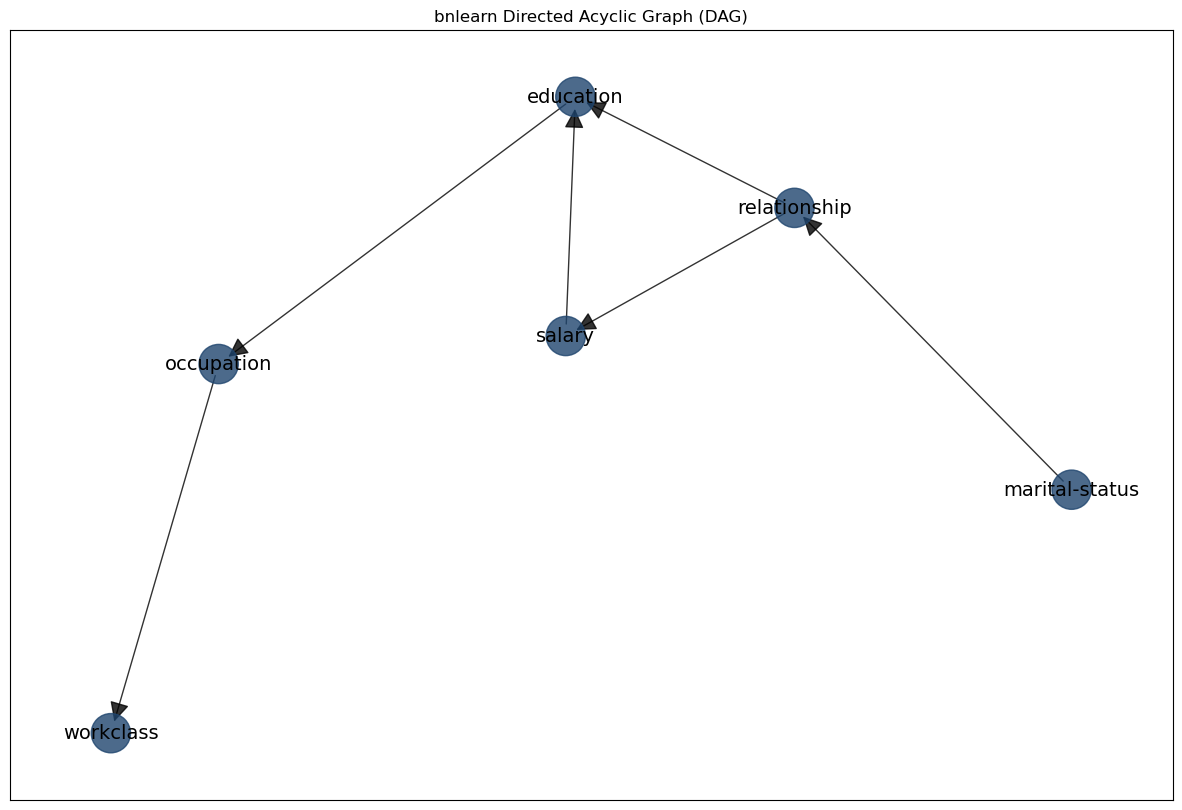

[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Converting source-target into adjacency matrix..
[bnlearn] >Making the matrix symmetric..
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


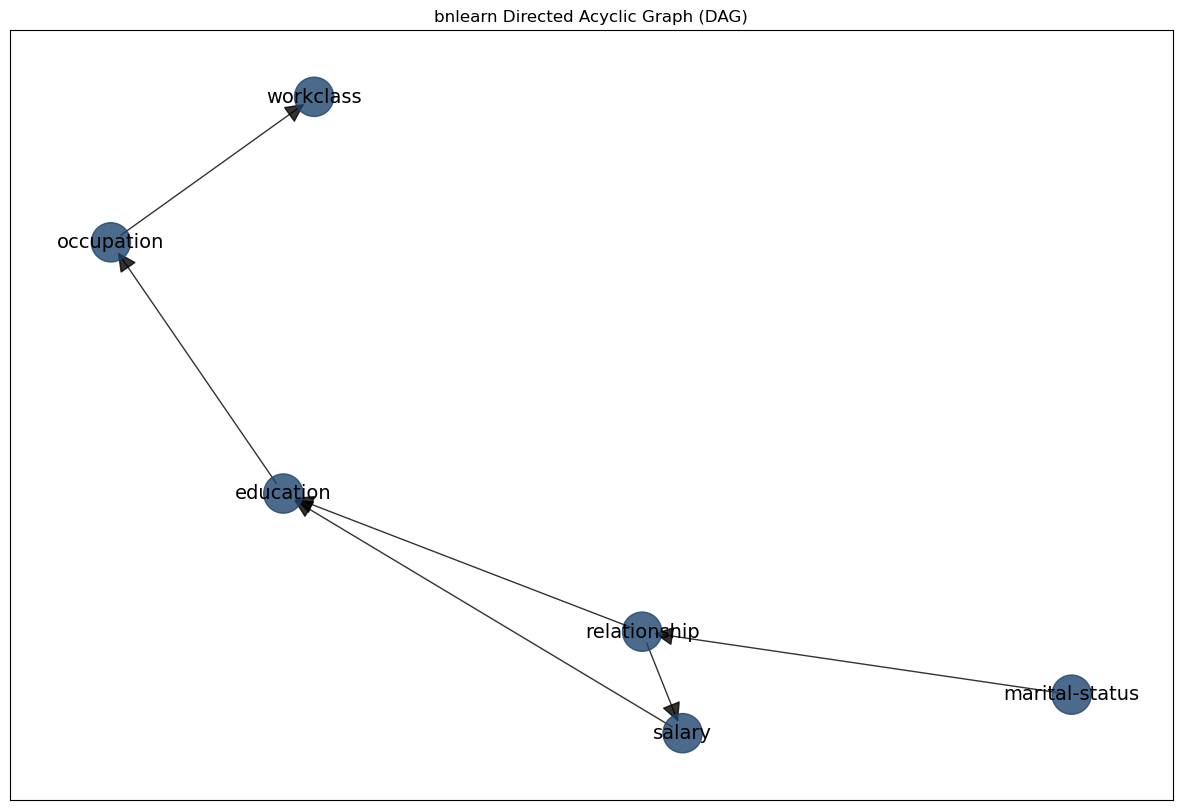

In [46]:

# Load library
import bnlearn as bn

# Structure learning
model = bn.structure_learning.fit(df, methodtype='hillclimbsearch', scoretype='bic')

# Make plot
G = bn.plot(model, interactive=False)

# Test edges significance and remove.
model = bn.independence_test(model, df, test="chi_square", alpha=0.05, prune=True)

# Make plot
G = bn.plot(model, interactive=False)


In [47]:

# Make plot interactive
G = bn.plot(model, interactive=True)

# Show edges
print(model['model_edges'])


[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Converting source-target into adjacency matrix..
[d3blocks] >INFO> Making the matrix symmetric..
[d3blocks] >INFO> Set directed=True to see the markers!
[d3blocks] >INFO> Keep only edges with weight>0
[d3blocks] >INFO> Converting source-target into adjacency matrix..
[d3blocks] >INFO> Making the matrix symmetric..
[d3blocks] >INFO> Converting adjacency matrix into source-target..
[d3blocks] >INFO> Number of unique nodes: 6
[d3blocks] >INFO> Slider range is set to [0, 1]


[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Converting source-target into adjacency matrix..
[bnlearn] >Making the matrix symmetric..
[bnlearn] >Set edge properties.


[d3blocks] >INFO> Write to path: [C:\Users\ryan_\AppData\Local\Temp\tmpv8cmgl25\d3graph.html]
[d3blocks] >INFO> File already exists and will be overwritten: [C:\Users\ryan_\AppData\Local\Temp\tmpv8cmgl25\d3graph.html]
[d3blocks] >INFO> Keep only edges with weight>0
[d3blocks] >INFO> Converting source-target into adjacency matrix..
[d3blocks] >INFO> Making the matrix symmetric..
[d3blocks] >INFO> Number of unique nodes: 6
[d3blocks] >INFO> Slider range is set to [0, 1]
[d3blocks] >INFO> Write to path: [C:\Users\ryan_\AppData\Local\Temp\tmp6bnfg7gm\bnlearn_Directed_Acyclic_Graph_(DAG).html]
[d3blocks] >INFO> File already exists and will be overwritten: [C:\Users\ryan_\AppData\Local\Temp\tmp6bnfg7gm\bnlearn_Directed_Acyclic_Graph_(DAG).html]


[('education', 'occupation'), ('marital-status', 'relationship'), ('occupation', 'workclass'), ('relationship', 'salary'), ('relationship', 'education'), ('salary', 'education')]


In [6]:

# Learn the CPDs using the estimated edges.
# Note that we can also customize the edges or manually provide a DAG.
# model = bn.make_DAG(model['model_edges'])

# Learn the CPD by providing the model and dataframe
model = bn.parameter_learning.fit(model, df)

# Print the CPD
CPD = bn.print_CPD(model)


[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of education:
+-------------------------+-----------------------+-----+----------------------+----------------------+
| relationship            | relationship(Husband) | ... | relationship(Wife)   | relationship(Wife)   |
+-------------------------+-----------------------+-----+----------------------+----------------------+
| salary                  | salary(<=50K)         | ... | salary(<=50K)        | salary(>50K)         |
+-------------------------+-----------------------+-----+----------------------+----------------------+
| education(10th)         | 0.03617780294450736   | ... | 0.035536962118425885 | 0.008702213279678066 |
+-------------------------+-----------------------+-----+----------------------+----------------------+
| education(11th)         | 0.03753680634201586  

In [7]:

# Start making inferences
query = bn.inference.fit(model, variables=['salary'], evidence={'education':'Doctorate'})
print(query)


[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+----------+----------+
|    | salary   |        p |
+====+==========+==========+
|  0 | <=50K    | 0.290747 |
+----+----------+----------+
|  1 | >50K     | 0.709253 |
+----+----------+----------+
+---------------+---------------+
| salary        |   phi(salary) |
+===============+===============+
| salary(<=50K) |        0.2907 |
+---------------+---------------+
| salary(>50K)  |        0.7093 |
+---------------+---------------+


In [8]:

query = bn.inference.fit(model, variables=['salary'], evidence={'education':'HS-grad'})
print(query)


[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+----------+----------+
|    | salary   |        p |
+====+==========+==========+
|  0 | <=50K    | 0.838477 |
+----+----------+----------+
|  1 | >50K     | 0.161523 |
+----+----------+----------+
+---------------+---------------+
| salary        |   phi(salary) |
+===============+===============+
| salary(<=50K) |        0.8385 |
+---------------+---------------+
| salary(>50K)  |        0.1615 |
+---------------+---------------+


In [9]:

# Start making inferences
query = bn.inference.fit(model, variables=['workclass'], evidence={'education':'Doctorate', 'marital-status':'Never-married'})
print(query)


[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    | workclass        |          p |
+====+==================+============+
|  0 | ?                | 0.0420424  |
+----+------------------+------------+
|  1 | Federal-gov      | 0.0420328  |
+----+------------------+------------+
|  2 | Local-gov        | 0.132582   |
+----+------------------+------------+
|  3 | Never-worked     | 0.0034366  |
+----+------------------+------------+
|  4 | Private          | 0.563884   |
+----+------------------+------------+
|  5 | Self-emp-inc     | 0.0448046  |
+----+------------------+------------+
|  6 | Self-emp-not-inc | 0.0867973  |
+----+------------------+------------+
|  7 | State-gov        | 0.0810306  |
+----+------------------+------------+
|  8 | Without-pay      | 0.00338961 |
+----+------------------+------------+
+-----------------------------+--------------

In [ ]:

# Here are some key features and functionalities of pgmpy:
# (Probabilistic Graphical Models in Python) is a Python library for working with Probabilistic Graphical Models 

# (PGMs). Probabilistic Graphical Models are a class of statistical models that represent the probabilistic relationships 
# among a set of variables using a graph structure. These models are widely used for modeling and reasoning under 
# uncertainty in various fields, including machine learning, artificial intelligence, and statistics.

# Representation of PGMs:
#  pgmpy allows users to represent different types of graphical models, including Bayesian Networks (BNs), Markov 
#  Networks, and Factor Graphs.

# Inference Algorithms:
#  The library provides algorithms for performing inference in graphical models, including exact inference algorithms 
#  (e.g., Variable Elimination) and approximate inference algorithms (e.g., Belief Propagation, Gibbs Sampling).

# Parameter Learning:
#  pgmpy supports parameter learning, which involves estimating the parameters of the graphical model from data.

# Structure Learning:
#  The library includes algorithms for learning the structure of graphical models from data, such as constraint-based 
#  methods and score-based methods.

# Extensions for Dynamic Bayesian Networks (DBNs):
#  pgmpy supports the representation and analysis of Dynamic Bayesian Networks, which are extensions of Bayesian Networks 
#  to model temporal dependencies.

# Support for Markov Random Fields (MRFs):
#  In addition to Bayesian Networks, pgmpy allows users to work with Markov Random Fields, which model dependencies among 
#  variables without necessarily specifying a causal relationship.

# Compatibility with NetworkX:
#  pgmpy seamlessly integrates with NetworkX, a popular Python library for working with graphs, allowing users to visualize 
#  and analyze graphical models using NetworkX's functionalities.

# Open Source and Community-Driven:
#  pgmpy is an open-source project, and its development is driven by the community. Users can contribute to the library 
#  and participate in discussions.


In [12]:

# Install pgmpy
# pip install pgmpy

# Import functions from pgmpy
from pgmpy.estimators import HillClimbSearch, BicScore, BayesianEstimator
from pgmpy.models import BayesianNetwork, NaiveBayes
from pgmpy.inference import VariableElimination

# Import data set and drop continous and sensitive features
df = bn.import_example(data='census_income')
drop_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'race', 'sex']
df.drop(labels=drop_cols, axis=1, inplace=True)

# Create estimator
est = HillClimbSearch(df)

# Create scoring method
scoring_method = BicScore(df)

# Create the model and print the edges
model = est.estimate(scoring_method=scoring_method)

# Show edges
print(model.edges())


  0%|          | 0/1000000 [00:00<?, ?it/s]

[('education', 'occupation'), ('marital-status', 'relationship'), ('occupation', 'workclass'), ('relationship', 'salary'), ('relationship', 'education'), ('salary', 'education')]


In [13]:

vec = {
    'source': ['education', 'marital-status', 'occupation', 'relationship', 'relationship', 'salary'],
    'target': ['occupation', 'relationship', 'workclass', 'education', 'salary', 'education'],
    'weight': [True, True, True, True, True, True]
}

vec = pd.DataFrame(vec)

# Create Bayesian model
bayesianmodel = BayesianNetwork(vec)

# Fit the model
bayesianmodel.fit(df, estimator=BayesianEstimator, prior_type='bdeu', equivalent_sample_size=1000)

# Create model for variable elimination
model_infer = VariableElimination(bayesianmodel)

# Query
query = model_infer.query(variables=['salary'], evidence={'education':'Doctorate'})
print(query)


+---------------+---------------+
| salary        |   phi(salary) |
+===============+===============+
| salary(<=50K) |        0.2907 |
+---------------+---------------+
| salary(>50K)  |        0.7093 |
+---------------+---------------+


In [31]:

# Here are some key features and functionalities of dowhy:

# DoWhy is a Python library for causal inference that provides a unified interface for estimating causal effects using 
# different methods. It is developed by Microsoft Research and is designed to make causal inference accessible and easy 
# to use for both researchers and practitioners.

# Unified Interface:
#  DoWhy offers a high-level, unified interface for specifying and estimating causal models. Users can specify causal 
#  models using a simple format that includes information about treatment, outcome, common causes, and instruments.

# Identification and Estimation Methods:
#  The library supports various identification and estimation methods for causal inference, including backdoor adjustment, 
#  instrumental variable methods, and propensity score matching.

# Automated Model Refutation:
#  DoWhy includes automated tools for model refutation, allowing users to check the robustness of their causal models by 
#  simulating alternative data scenarios and checking if the estimated effects remain consistent.

# Integration with Existing Libraries:
#  It seamlessly integrates with popular libraries for machine learning and statistical modeling, such as scikit-learn 
#  and statsmodels.

# Sensitivity Analysis:
#  The library provides tools for sensitivity analysis to assess the impact of unobserved confounders on causal estimates.

# Graphical Representation:
#  DoWhy can automatically generate causal graphs to visually represent the causal relationships specified in a given model.

# Documentation and Tutorials:
#  DoWhy comes with comprehensive documentation and tutorials, making it easier for users to get started with causal 
#  inference and understand the principles behind the methods. 
        

[d3blocks] >WARNING> Causal Graph not provided. DoWhy will construct a graph based on data inputs.


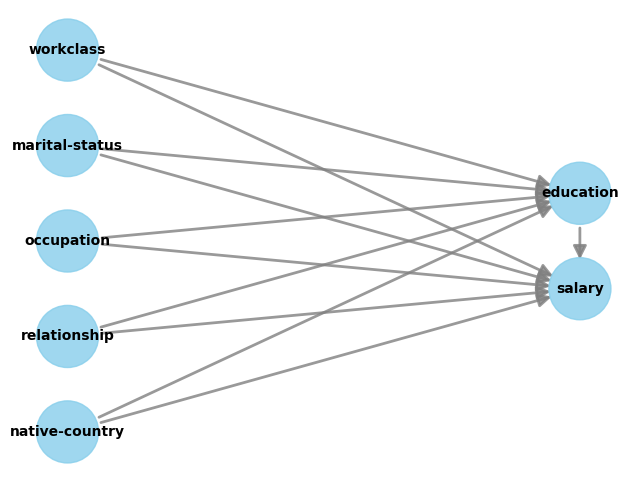

In [33]:

# Installation
# pip install dowhy

# Import libraries
from dowhy import CausalModel
import dowhy.datasets
from sklearn.preprocessing import LabelEncoder

# Import data set and drop continous and sensitive features
df = bn.import_example(data='census_income')
drop_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'race', 'sex']
df.drop(labels=drop_cols, axis=1, inplace=True)

# Treatment variable must be binary
df['education'] = df['education']=='Doctorate'

# Initialize LabelEncoder
le = LabelEncoder()

# Next, we need to make our data numeric.
df_num = df.copy()
for col in df_num.columns:
    df_num[col] = le.fit_transform(df_num[col])

# Specify the treatment, outcome, and potential confounding variables
treatment = "education"
outcome = "salary"

# Step 1. Create a Causal Graph
model= CausalModel(
        data=df_num,
        treatment=treatment,
        outcome=outcome,
        common_causes=list(df.columns[~np.isin(df.columns, [treatment, outcome])]),
        graph_builder='ges',
        alpha=0.05,
        )

# Display the model
model.view_model()


In [35]:

# Step 2: Identify causal effect and return target estimands
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)

# Results
print(identified_estimand)


Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(E[salary|relationship,occupation,marital-status,native-country,wo
d[education]                                                                  

         
rkclass])
         
Estimand assumption 1, Unconfoundedness: If U→{education} and U→salary then P(salary|education,relationship,occupation,marital-status,native-country,workclass,U) = P(salary|education,relationship,occupation,marital-status,native-country,workclass)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [36]:

# Step 3: Estimate the target estimand using a statistical method.
estimate = model.estimate_effect(identified_estimand, method_name="backdoor.propensity_score_stratification")

# Results
print(estimate)


*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(E[salary|relationship,occupation,marital-status,native-country,wo
d[education]                                                                  

         
rkclass])
         
Estimand assumption 1, Unconfoundedness: If U→{education} and U→salary then P(salary|education,relationship,occupation,marital-status,native-country,workclass,U) = P(salary|education,relationship,occupation,marital-status,native-country,workclass)

## Realized estimand
b: salary~education+relationship+occupation+marital-status+native-country+workclass
Target units: ate

## Estimate
Mean value: 0.4697157228651772



In [34]:

# Here are some key features and functionalities of causalimpact:

# Description: pycausalimpact is a Python implementation of the CausalImpact algorithm developed by Google. The algorithm 
# is designed to estimate the causal effect of an intervention in a time series, allowing you to assess the impact of 
# changes on a response variable.

# Key Features:
#  Provides a Bayesian structural time series model for causal inference.
#  Allows users to specify a pre-intervention and post-intervention period.
#  Generates counterfactual predictions to estimate what would have happened without the intervention.
#  Computes point estimates and credible intervals for the causal effect.
#  Supports visualization of the causal impact analysis results.


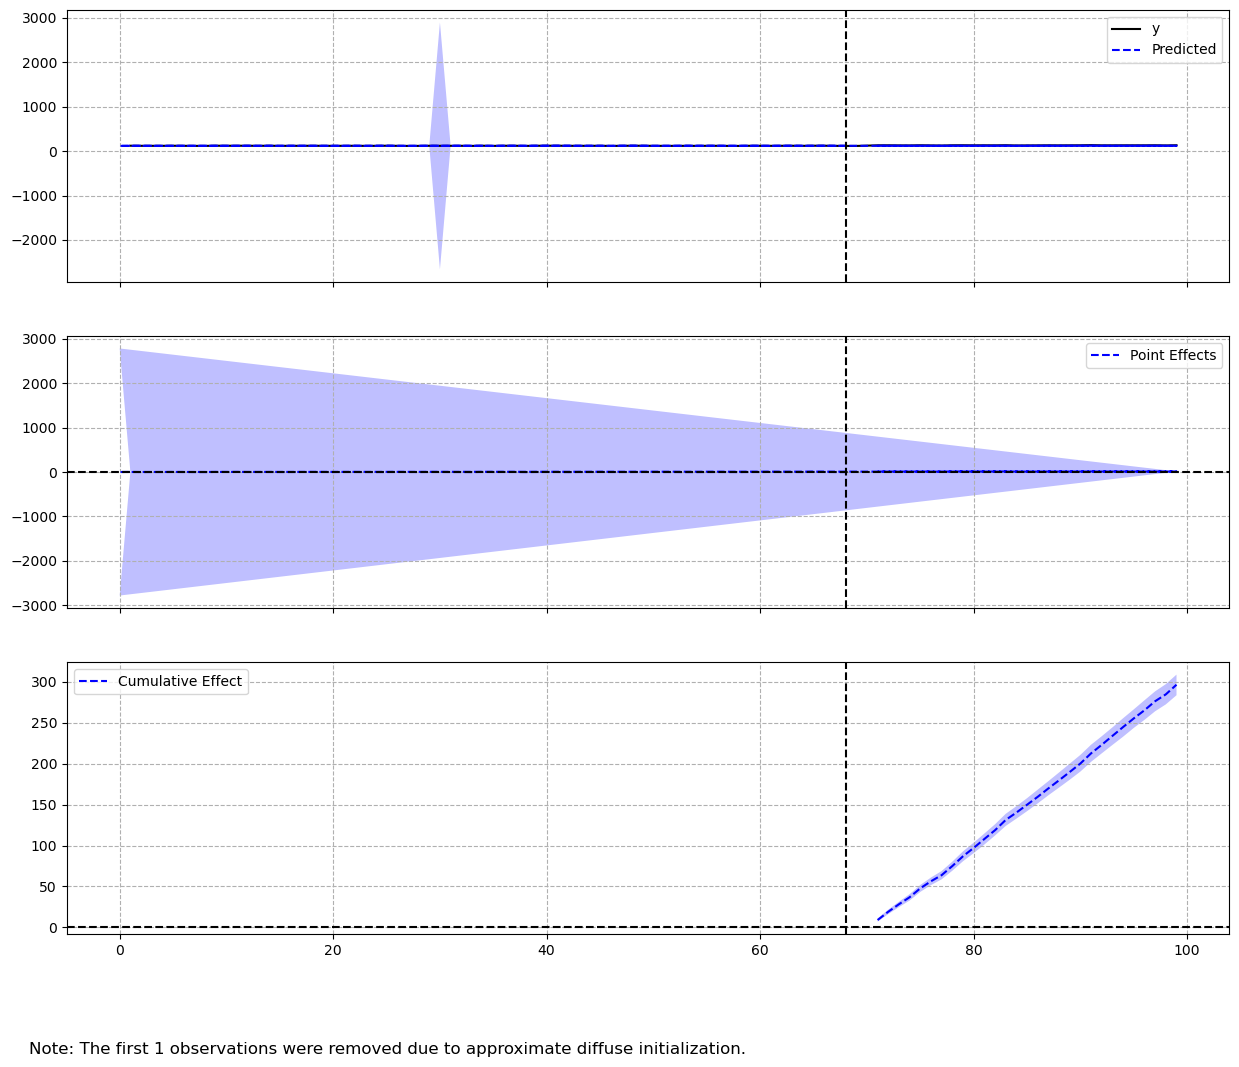

'Analysis report {CausalImpact}\n\n\nDuring the post-intervention period, the response variable had\nan average value of approx. 130.25. By contrast, in the absence of an\nintervention, we would have expected an average response of 120.03.\nThe 95% interval of this counterfactual prediction is [119.6, 120.47].\nSubtracting this prediction from the observed response yields\nan estimate of the causal effect the intervention had on the\nresponse variable. This effect is 10.23 with a 95% interval of\n[9.78, 10.65]. For a discussion of the significance of this effect,\nsee below.\n\n\nSumming up the individual data points during the post-intervention\nperiod (which can only sometimes be meaningfully interpreted), the\nresponse variable had an overall value of 3777.38.\nBy contrast, had the intervention not taken place, we would have expected\na sum of 3480.84. The 95% interval of this prediction is [3468.49, 3493.73].\n\n\nThe above results are given in terms of absolute numbers. In relativ

In [40]:

# Installation
# pip install causalimpact

# Import libraries
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import arma_generate_sample
import matplotlib.pyplot as plt
from causalimpact import CausalImpact

# Generate samples
x1 = arma_generate_sample(ar=[0.999], ma=[0.9], nsample=100) + 100
y = 1.2 * x1 + np.random.randn(100)
y[71:] = y[71:] + 10
data = pd.DataFrame(np.array([y, x1]).T, columns=["y","x1"])

# Initialize
impact = CausalImpact(data, pre_period=[0,69], post_period=[71,99])

print(impact)

# Plot
impact.plot()

# Results
impact.summary()


# Summary report
impact.summary(output="report")


In [ ]:

# In Conclusion:

# bnlearn (Bayesian Networks):
#  Use Case: Choose bnlearn if you specifically want to work with Bayesian networks and probabilistic graphical models for causal inference.
#  Strengths:
#  Well-suited for representing and reasoning about causal relationships in complex systems.
#  Supports Bayesian network learning, parameter estimation, and inference.
#  Limitations:
#  Focuses on Bayesian networks and may be less versatile for other causal inference approaches.

# pgmpy (Probabilistic Graphical Models):
#  Use Case: Choose pgmpy for a more general-purpose library that supports various types of probabilistic graphical models, including Bayesian networks.
#  Strengths:
#  Versatile for different graphical models and causal inference tasks.
#  Provides algorithms for structure learning, parameter learning, and inference.
#  Limitations:
#  May have a steeper learning curve, especially for users new to graphical models.

# DoWhy (Causal Inference):
#  Use Case: Choose DoWhy if you want a high-level, unified interface for causal inference tasks, including identification, estimation, and model checking.
#  Strengths:
#  Simplifies the causal inference process with a standardized approach.
#  Supports various identification and estimation methods.
#  Automated tools for model checking and refutation.
#  Limitations:
#  May not cover all specialized methods available in other libraries for specific use cases.

# CausalImpact (Time Series Causal Analysis):
#  Use Case: Choose CausalImpact for analyzing the causal impact of interventions on time series data.
#  Strengths:
#  Specialized for time series data with a focus on causal impact analysis.
#  Bayesian structural time series modeling for creating counterfactuals.
#  Limitations:
#  Tailored for time series analysis, may not be suitable for non-temporal data.
    